# Statistiche e grafici delle risoluzioni<br>Cubo di Rubik 2x2x2

<img src="../immagini/cubo_2x2x2.jpg" width="400" height="400">

In [2]:
from pandas import read_csv
import matplotlib.pyplot as plt
import modulo_rubik

df = read_csv("../database.csv", sep="\t", parse_dates=["Data"])
df = df[df["Cubo"] == "2x2x2"]
# Inserimento colonna "Tempo" con i secondi convertiti in minuti e secondi
df.insert(loc=2, column="Tempo", value=df["Secondi"].apply(modulo_rubik.conversione_secondi))
df = modulo_rubik.aggiunta_colonne_data(df)

## Ultime 10 risoluzioni

In [3]:
# Ultime 10 risoluzioni
df.tail(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo


## Record attuale🥇

In [4]:
# Record
minuti, secondi = modulo_rubik.conversione_secondi((modulo_rubik.ricerca_record("2x2x2")))
print(f"Il record attuale è di {minuti} minuti e {secondi} secondi")

Il record attuale è di 0 minuti e 0 secondi


## Classifica 10 migliori risoluzioni 🥇🥈🥉...

In [5]:
# Classifica 10 migliori risoluzioni
df.sort_values(by="Secondi", ascending=True).head(10)

,Data completa,Anno,Mese,Giorno,Secondi,Tempo,Cubo


## Tempo medio mensile delle risoluzioni

In [6]:
# Tempo medio mensile risoluzioni
df.groupby(by=["Mese"], sort=False)["Secondi"].mean().round(2)

Series([], Name: Secondi, dtype: float64)

IndexError: index 0 is out of bounds for axis 0 with size 0

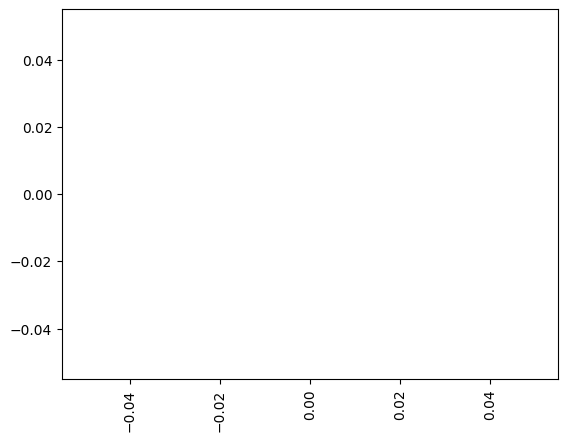

In [7]:
# Grafico tempo medio mensile risoluzioni
modulo_rubik.grafico_medie_mensili(df_cubo=df, anno=2026)

In [ ]:
modulo_rubik.grafico_medie_annuali(df_cubo=df)

In [ ]:
modulo_rubik.grafico_record_media_massimo(df)

In [ ]:
# Numero di risoluzioni del 2026 in base al mese
df[df["Anno"]==2026]["Mese"].value_counts()

In [ ]:
# Grafico del numero di risoluzioni del 2026 in base al mese
modulo_rubik.grafico_risoluz_mensile(df_cubo=df, anno=2026)